<a href="https://colab.research.google.com/github/pwbve80b/-NN_DL_image/blob/main/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%A7%D1%82%D0%BE_%D1%82%D0%B0%D0%BA%D0%BE%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортируем нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

## Загружаем данные

In [ ]:
data = pd.read_csv('dataset.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,p_1,p_2,target,pred
0,3.60,2.60,0,0
1,4.25,0.95,1,0
2,3.00,1.34,1,0
3,4.07,1.26,1,0
4,3.80,2.71,0,0


## Функция для отрисовки граници разделения классов

In [ ]:
def plot_ex(df, name_x1, name_x2, fun):
    x_min, x_max = df[name_x1].min() - 5, df[name_x1].max() + 5
    y_min, y_max = df[name_x2].min() - 5, df[name_x2].max() + 5

    h = .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = fun(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

    sns.scatterplot(x=df[name_x1], y=df[name_x2], hue=df['target'], palette=['#00aa00','#0000ff'])
    plt.xlabel(name_x1)
    plt.ylabel(name_x2)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

## Подберем параметры модели

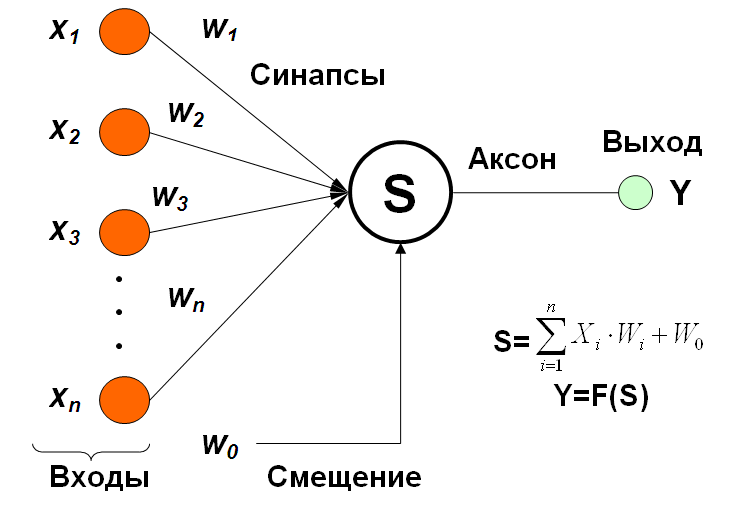


### Модель
Модель состоит из одного нейрона с двумя входами, так как у нас всего 2 признака.

$L = w_1 x_1 + w_2 x_2 + b$

Функция активация - сигмоида
$
\begin{align}
\frac{1}{1 + e^{-L}} 
\end{align}
$

Итого функция описывающая нашу модель

$
\begin{align}
f(x_1,x_2) = \frac{1}{1 + e^{-(w_1 x_1 + w_2 x_2 + b)}} 
\end{align}
$

Порог для принятия решения о том, что объект относится к 1 классу равен 0.5

т.е. если $f(x_1,x_2) > 0.5$, то класс '1', а если $f(x_1,x_2) \le 0.5$, то '0'

Наша задача в том чтобы подобрать такие $w_1$, $w_2$ и $b$, что бы модель давала верный прогноз по максимально возможному числу случаев

Для этого вам нужно перемещать ползунки до тех пор пока синие точки окажуться на одном цветовом поле и зеленые на другом. При этом они должны оказаться на тех цветовых полях,при которых доля верно распознаных случаев будет максимальна.

In [ ]:

# Подбираем значения параметров модели
# =====================

# функция описывающая работу нашей модели 
# здесь х это массив пар значений признаков
# вида [[0.1, 0.2]
#      [1.3, 3.1]
#      [2.1, 1.2]
#      ...       ]
def func(w1, w2, b):

  def f(x): 
      return  (1/(1+np.exp(-(w1*x[:,0]+w2*x[:,1] + b)))<=0.5)*1

  # Сделаем прогноз 
  data['pred'] = f(data[['p_1','p_2']].to_numpy())

  # Нарисуем границу разделения классов и выведем результат предсказания
  plot_ex(data, 'p_1', 'p_2', f)
  print(f"Доля верных ответов: {sum(data['target'] == data['pred'])/data.shape[0]}")
  
val_range = (-10,10,0.05)
y=interactive(func, 
              w1=val_range, 
              w2=val_range,  
              b=val_range, 
              )
display(y)

interactive(children=(FloatSlider(value=0.0, description='w1', max=10.0, min=-10.0, step=0.05), FloatSlider(va…

In [ ]:
data

,p_1,p_2,target,pred
0,3.60,2.60,0,0
1,4.25,0.95,1,0
2,3.00,1.34,1,0
3,4.07,1.26,1,0
4,3.80,2.71,0,0
5,8.15,2.08,0,0
6,3.10,1.87,1,0
7,3.65,2.88,0,0
8,4.72,2.01,1,0
9,4.80,1.14,1,0
